In [1]:
import torch

import torchvision.transforms.functional as TF
import torchvision.transforms as T
import torchvision
import torch.nn.functional as F

In [2]:
import cv2
from matplotlib import pyplot as plt
import os
import sys
import numpy as np


In [3]:
sys.path.insert(0, '/home/jaswant/Documents/DiscreteVAE/src')

In [4]:
from discretevae import Encoder, Decoder, DiscreteVAE2

In [5]:
num_tokens=8192
codebook_dim=2048
num_groups=4
hidden_base=128
num_blocks_per_group=2
num_layers_per_block=4
num_decoder_init=64
temperature=0.9
reconstrution_loss='smooth_l1_loss'
kl_div_loss_weight=0.01
logit_laplace_eps=None

dvae2 = DiscreteVAE2(num_tokens=num_tokens, codebook_dim=codebook_dim, 
                    num_groups=num_groups, hidden_base=hidden_base, 
                    num_blocks_per_group=num_blocks_per_group, num_layers_per_block=num_layers_per_block, 
                    num_decoder_init=num_decoder_init, temperature=temperature, 
                    reconstrution_loss=reconstrution_loss, kl_div_loss_weight=kl_div_loss_weight, 
                    logit_laplace_eps=None)


In [6]:
dvae2.load_state_dict(torch.load("/home/jaswant/Documents/DiscreteVAE/model_torch/dvae2_code8_kl001.bin"))

<All keys matched successfully>

In [7]:
device = torch.device("cuda:0")
dvae2 = dvae2.to(device)

In [8]:
to_tensor = T.ToTensor()

def transform_for_prediction(cv2_img):

    target_img_size = 256

    img = cv2_img

    h, w, _ = img.shape

    r = target_img_size / min(h, w)
    s = (round(r * h), round(r*w))
    # print(f'New size: {s}')

    img = cv2.resize(img, s, interpolation=cv2.INTER_CUBIC)

    h, w, _ = img.shape

    # Center crop
    x = w/2 - target_img_size/2
    y = h/2 - target_img_size/2

    crop_img = img[int(y):int(y+target_img_size),
                int(x):int(x+target_img_size)]
    
    # crop_img = crop_img.astype(np.float16)

    # img = TF.center_crop(img, output_size=2 * [self._target_img_size])
    # img = torch.unsqueeze(T.ToTensor()(crop_img), 0)

    return crop_img

mean_tensor = (0.4360, 0.4408, 0.4332)
std_tensor = (0.2619, 0.2639, 0.2616)
normal_transfrom = T.Compose([T.ToTensor(), T.Normalize(mean=mean_tensor, std=std_tensor)])
invTrans = T.Compose([ T.Normalize(mean = [ 0., 0., 0. ],
                                    std = [ 1/0.2619, 1/0.2639, 1/0.2616 ]),
                        T.Normalize(mean = [ -0.436, -0.4408, -0.4332 ],
                                    std = [ 1., 1., 1. ]),
                        T.ToPILImage()
                     ])

In [9]:
test_images = ["/home/jaswant/Documents/DiscreteVAE/data/Images/n02089867-Walker_hound/n02089867_55.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02088466-bloodhound/n02088466_1563.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02089867-Walker_hound/n02089867_145.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02088094-Afghan_hound/n02088094_472.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02106662-German_shepherd/n02106662_1094.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02105641-Old_English_sheepdog/n02105641_1500.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02102177-Welsh_springer_spaniel/n02102177_803.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02113023-Pembroke/n02113023_1257.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02110806-basenji/n02110806_1100.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02109047-Great_Dane/n02109047_1371.jpg",
               "/home/jaswant/Documents/DiscreteVAE/data/Images/n02108089-boxer/n02108089_849.jpg"]

torch.Size([1, 3, 256, 256])
loss: 0.3394215404987335, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.2351199835538864, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.2511272728443146, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.3169349431991577, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.33519554138183594, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.23697958886623383, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.2607412040233612, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.20564794540405273, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.37066614627838135, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.3254368305206299, Out Shape: torch.Size([1, 3, 256, 256])
torch.Size([1, 3, 256, 256])
loss: 0.238852620

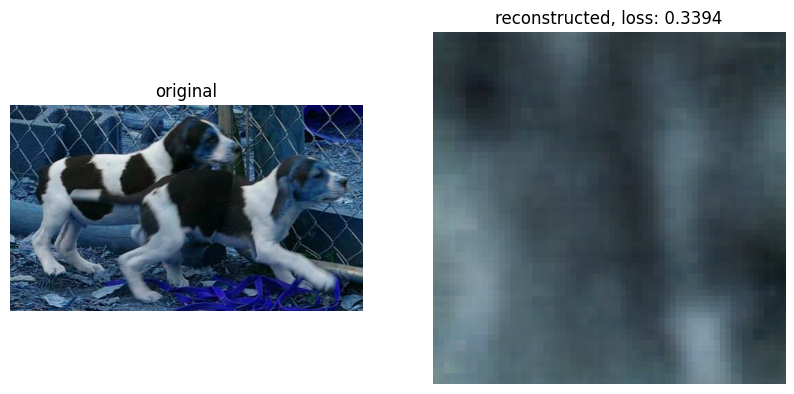

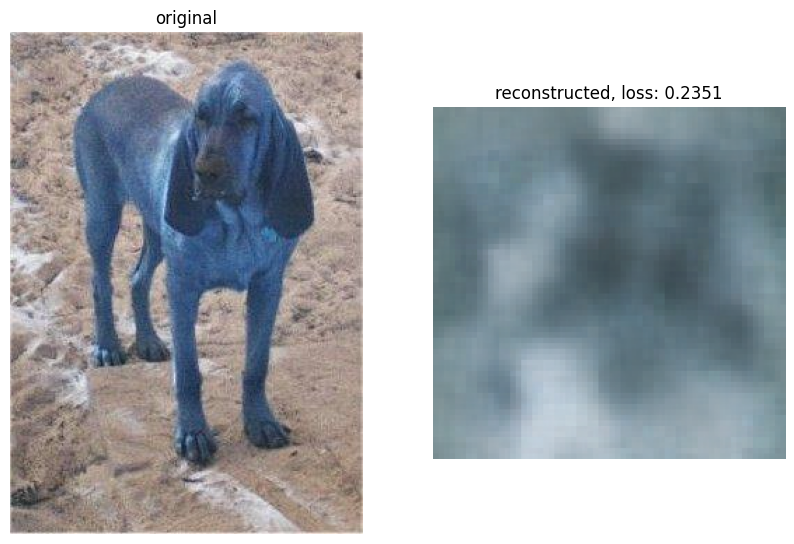

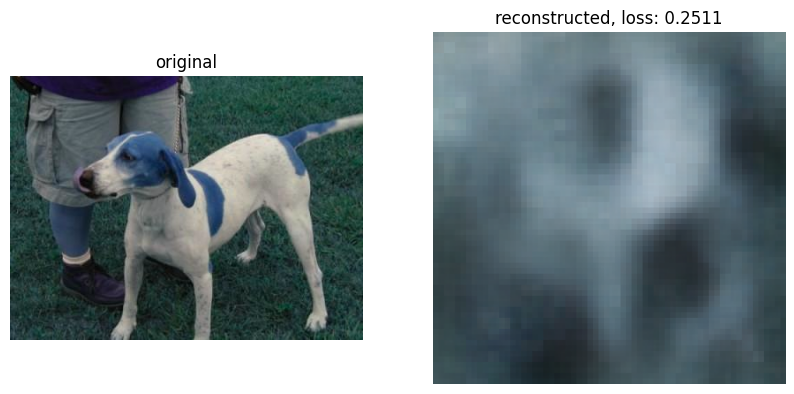

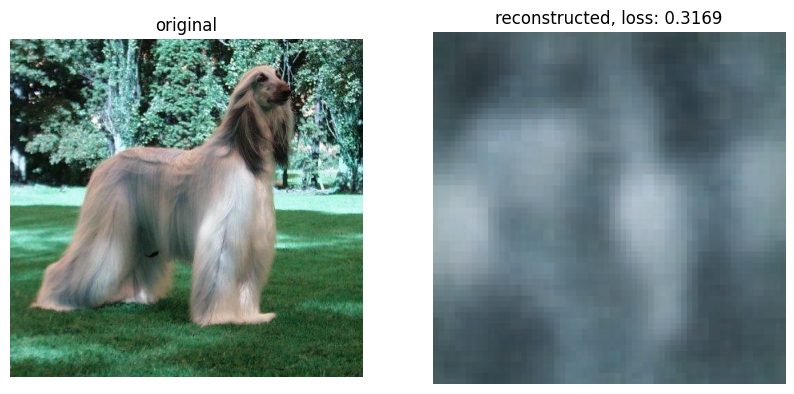

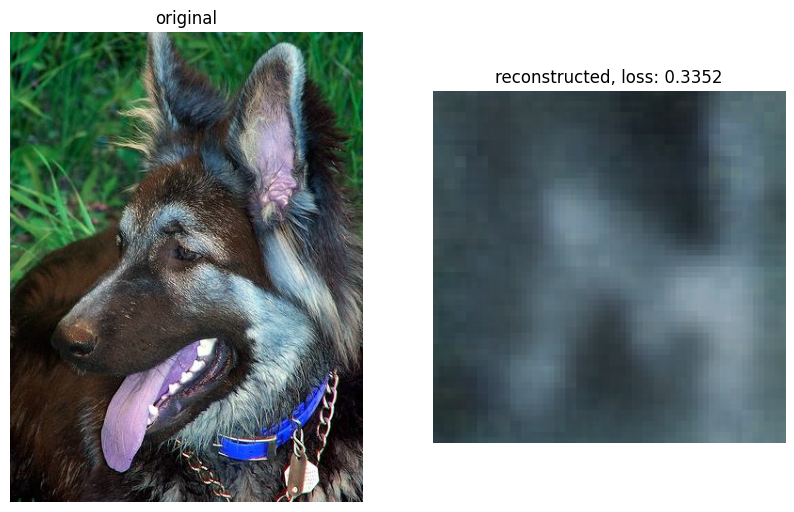

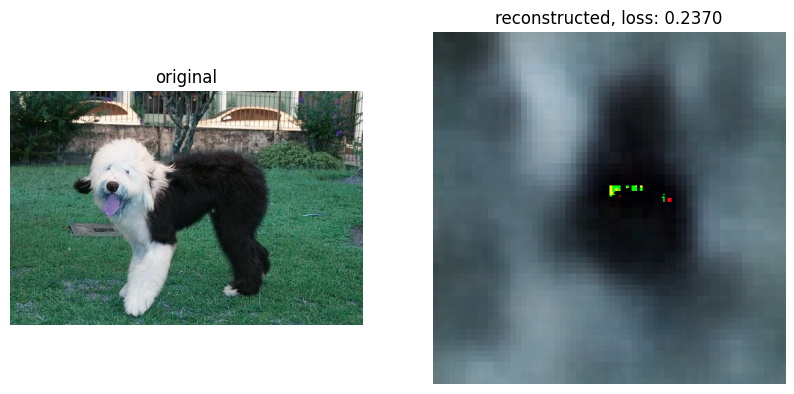

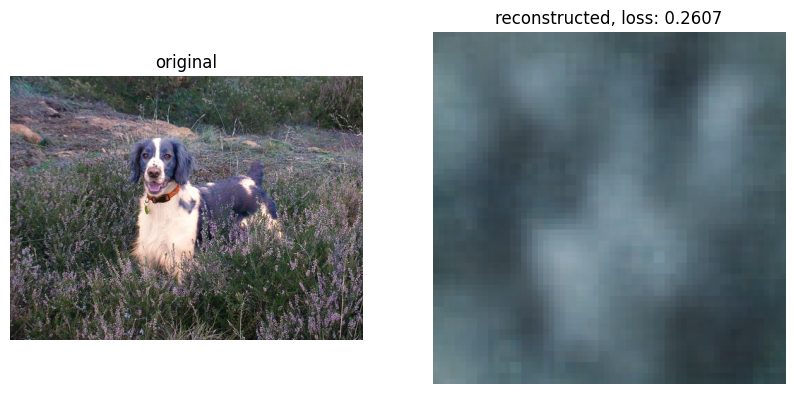

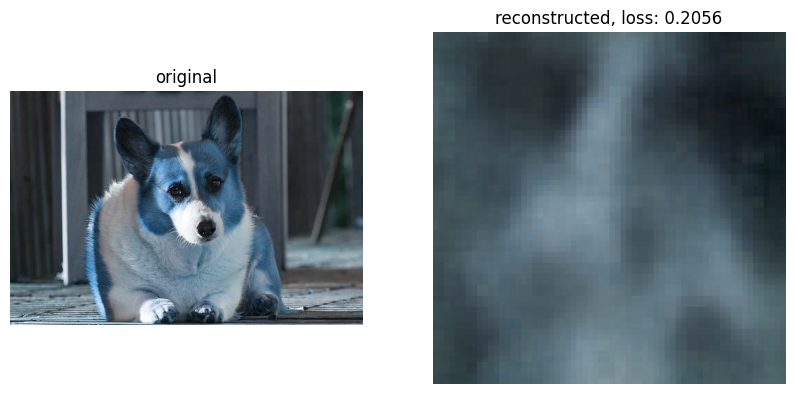

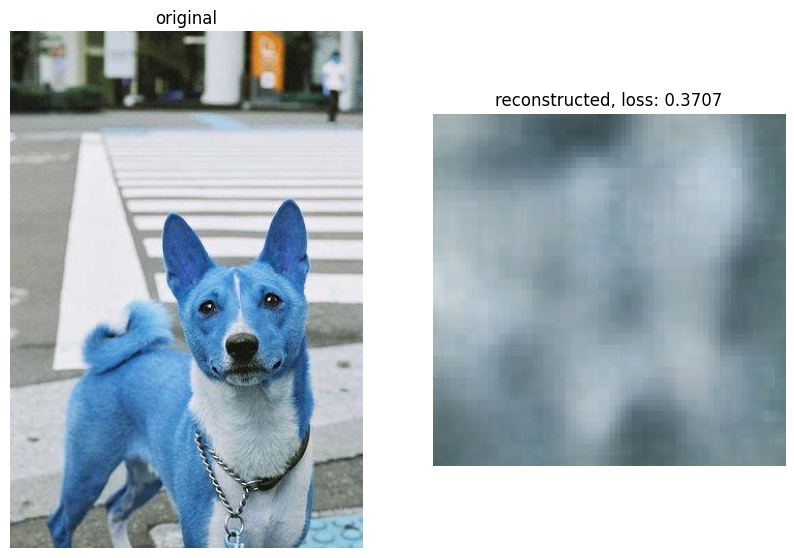

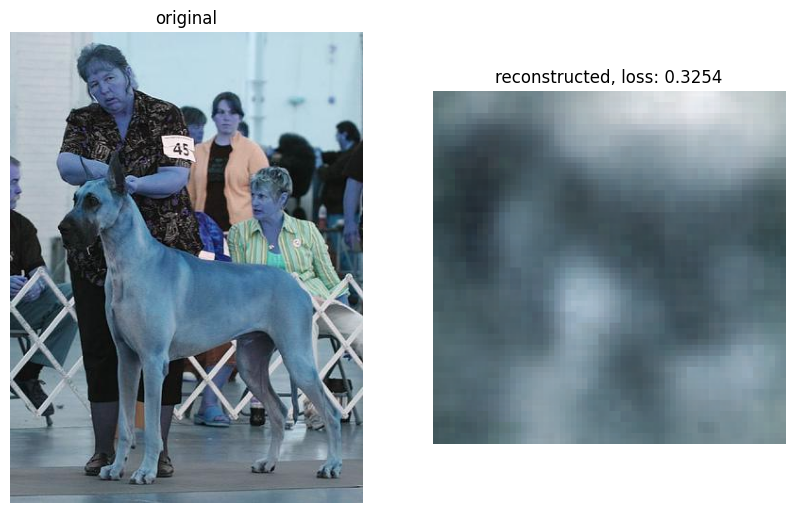

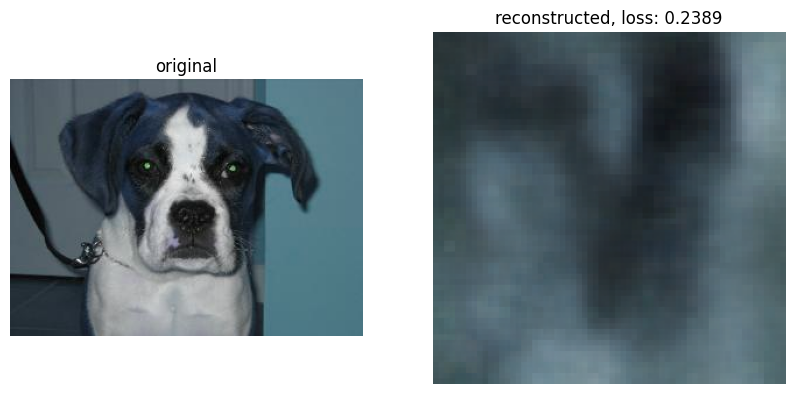

In [10]:
dvae2.eval()
for test_img_path in test_images:
    test_img = cv2.imread(test_img_path)
    test_img_tensor = transform_for_prediction(test_img)
    test_img_tensor = normal_transfrom(test_img_tensor)
    test_img_tensor = test_img_tensor.unsqueeze(0)

    test_img_tensor = test_img_tensor.to(device)

    print(test_img_tensor.shape)

    with torch.no_grad():
        loss, test_out = dvae2(test_img_tensor)
    print(f'loss: {loss}, Out Shape: {test_out.shape}')

    test_out = test_out.cpu()
    recon_image = invTrans(test_out[0])

    plt.figure(figsize=(10, 10))

    ax1 = plt.subplot(121)
    ax1.axis("off")
    ax1.set_title("original")
    ax1.imshow(test_img)


    ax2 = plt.subplot(122)
    ax2.axis("off")
    ax2.set_title(f'reconstructed, loss: {loss:0.4f}')
    plt.imshow(recon_image)


In [11]:
# test_img_tensor_recon = invTrans(test_img_tensor[0])

# plt.figure(figsize=(10, 10))

# ax1 = plt.subplot(121)
# ax1.axis("off")
# ax1.set_title("original")
# ax1.imshow(test_img_tensor_recon)


In [12]:
test_img = "/home/jaswant/Documents/DiscreteVAE/data/Images/n02108089-boxer/n02108089_849.jpg"

test_img = cv2.imread(test_img)
test_img_tensor = transform_for_prediction(test_img)
test_img_tensor = normal_transfrom(test_img_tensor)
test_img_tensor = test_img_tensor.unsqueeze(0)

test_img_tensor = test_img_tensor.to(device)

with torch.no_grad():
        enc_out = dvae2(test_img_tensor, return_logits=True)




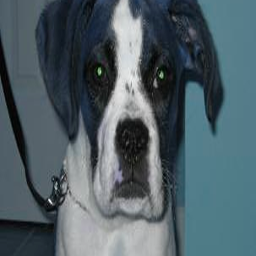

In [13]:
invTrans(test_img_tensor[0])

torch.Size([1, 8192, 32, 32])
torch.Size([1, 2048, 32, 32])
torch.Size([1, 3, 256, 256])


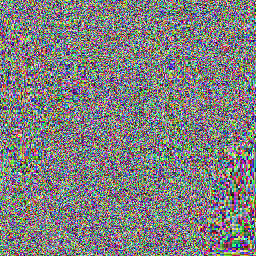

In [14]:
soft_one_hot = F.gumbel_softmax(enc_out, tau=0.4, dim=1)
print(soft_one_hot.shape)
sampled_info  = torch.einsum('b n h w, n d -> b d h w',
                                enc_out, dvae2.codebook.weight)

print(sampled_info.shape)
final = dvae2._decoder(sampled_info)
final = final[:, :3, :, :]
print(final.shape)

final = final.cpu()
recon_image = invTrans(final[0])
recon_image

In [15]:
dvae2._decoder

Decoder(
  (blocks): Sequential(
    (0): Sequential(
      (0): Conv2d(2048, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    )
    (1): DecoderGroup(
      (_group): Sequential(
        (0): DecoderBlock(
          (ch_equalizer): Conv2d(64, 1024, kernel_size=(1, 1), stride=(1, 1))
          (residual): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
            (1): ReLU()
            (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (3): ReLU()
            (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (5): ReLU()
            (6): Conv2d(256, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (7): ReLU()
          )
        )
        (1): DecoderBlock(
          (ch_equalizer): Identity()
          (residual): Sequential(
            (0): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
            (1): ReLU()
            (2): Co